In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt

In [2]:
data = pd.read_csv('dataset/file.csv')

In [3]:
data = data.dropna()
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,15/08/09,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,5,7,15,14,4,6,2,2,0,0
1,15/08/09,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,9,5,12,9,5,4,2,1,0,0
2,15/08/09,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,3,13,16,10,4,7,2,1,0,0
3,15/08/09,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,12,3,13,15,12,4,1,2,0,0
4,15/08/09,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,5,9,11,13,4,9,0,0,0,0


In [4]:
import matplotlib.pyplot as plt
HWins = np.sum(data.FTR == 'H')
AWins = np.sum(data.FTR == 'A')
DWins = np.sum(data.FTR == 'D')
labels = ['Home', 'Away', 'Draw']

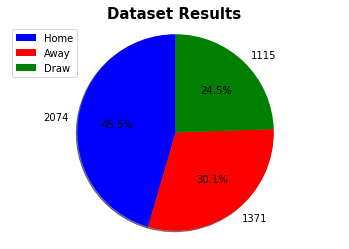

In [5]:
sizes = [HWins, AWins, DWins]
colors = ['blue', 'red', 'green']
patches, texts, juck = plt.pie(sizes, labels = sizes , colors=colors, shadow=True, startangle=90, radius = 2, autopct='%1.1f%%')
plt.title("Dataset Results",size=15,fontweight='bold')
plt.legend(patches, labels, loc="upper left")
plt.axis('equal')
plt.show()

In [6]:
team_name_list = data['HomeTeam']
team_name=[]
for teams in team_name_list:
    if teams not in team_name:
        team_name.append(teams)
print("\n\nTeams ")
display(team_name)



Teams 


['Aston Villa',
 'Blackburn',
 'Bolton',
 'Chelsea',
 'Everton',
 'Portsmouth',
 'Stoke',
 'Wolves',
 'Man United',
 'Tottenham',
 'Sunderland',
 'Wigan',
 'Birmingham',
 'Burnley',
 'Hull',
 'Liverpool',
 'Arsenal',
 'Man City',
 'Fulham',
 'West Ham',
 'West Brom',
 'Newcastle',
 'Blackpool',
 'QPR',
 'Swansea',
 'Norwich',
 'Reading',
 'Southampton',
 'Crystal Palace',
 'Cardiff',
 'Leicester',
 'Bournemouth',
 'Watford',
 'Middlesbrough',
 'Brighton',
 'Huddersfield',
 'Sheffield United',
 'Leeds']

In [7]:
def getTeamData(teamName):
    print("\nTEAM NAME: "+ teamName + "\n")
    
    #Total Number of Goals
    gamesHome = data[data['HomeTeam']== teamName]
    totalGoalsScored = gamesHome['FTHG'].sum()
    gamesAway = data[data['AwayTeam'] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    totalGoalsScored += gamesAway['FTAG'].sum() 
    
    
    #Allowed Goals
    totalGoalsAllowed = gamesHome['FTHG'].sum()
    totalGoalsAllowed += gamesAway['FTAG'].sum()
    
    #Discipline Cards
    totalYellowCards = gamesHome['HY'].sum()
    totalYellowCards += gamesAway['AY'].sum()
    totalRedCards = gamesHome['HR'].sum()
    totalRedCards += gamesAway['AR'].sum()
    
    #Total Fouls
    totalFouls = gamesHome['HF'].sum()
    totalFouls += gamesAway['AF'].sum()
    
    
    #Total Corners
    totalCorners = gamesHome['HC'].sum()
    totalCorners += gamesAway['AC'].sum()
    
    
    #Shots Per Game AVG
    totalShots = gamesHome['HS'].sum()
    totalShots += gamesAway['AS'].sum()
    
    #Avg Shots Allowed Per Game
    totalShotsAgainst = gamesHome['AS'].sum()
    totalShotsAgainst += gamesAway['HS'].sum()
    if numGames != 0:
        HSPG = totalShots / numGames #HomeShotsPerGame
        ASPG = totalShotsAgainst / numGames #AwayShotsPerGame
        display("HSPG: {}".format(HSPG))
        display("ASPG: {}".format(ASPG))
    
    #Winning %
    gamesWon = totalGames[totalGames['FTR']== "H"]
    gamesLost = totalGames[totalGames['FTR'] == "A"]
    gamesDraw = totalGames[totalGames['FTR'] == "D"]
    numGamesWon = len(gamesWon.index)
    numGamesLost = len(gamesLost.index)
    numGamesDraw = len(gamesDraw.index)
    
    if numGames != 0:
        gamesWonPercent = numGamesWon / numGames
        gamesLostPercent = numGamesLost / numGames
        gamesDrawPercent = numGamesDraw / numGames 
    
    print("Games Win Percent: {}".format(gamesWonPercent))
    print("Games Loose Percent: {}".format(gamesLostPercent))
    print("Games Draw Percent: {}".format(gamesDrawPercent))
    
    
    #Total shots on target:
    totalShotsOnTarget = gamesHome['HST'].sum()
    totalShotsOnTarget += gamesAway['AST'].sum()
    
    #GoalSaves
    goalSaves = totalShotsOnTarget - totalGoalsAllowed
    
    #Goal Save Percentage
    if totalShotsOnTarget != 0:
        goalSavesPercent = goalSaves / totalShotsOnTarget
        
    #Goal Save Ratio
    if goalSaves != 0:
        saveRatio = totalShotsOnTarget / goalSaves
    
    #Goal scoring Percent
    if totalShots != 0 :
        scoringPercent = (totalShots - totalGoalsScored)/totalShots
    
    #Goal scoring Ration
    if totalGoalsScored != 0:
        scoringRatio = totalShotsOnTarget / totalGoalsScored
        
    if numGames == 0: 
        gamesWon = 0
        gamesLost = 0
        gamesDraw = 0 
        totalGoalsScored = 0 
        totalShotsOnTarget = 0 
        totalGoalsAllowed = 0 
        totalYellowCards = 0 
        totalRedCards = 0 
        totalFouls = 0 
        totalCorners = 0 
        totalShots = 0 
        totalShotsAgainst = 0 
        HSPG = 0 #HomeShotsPerGame 
        ASPG = 0 #AwayShotsPerGame 
        goalSaves = 0 
        goalSavesPercent = 0 
        scoringPercent = 0 
        saveRatio = 0 
        scoringRatio = 0
    
    return [teamName, totalGoalsScored, totalShotsOnTarget, totalGoalsAllowed, 
            totalYellowCards, totalRedCards,totalFouls, totalCorners, 
            totalShots, totalShotsAgainst, HSPG, ASPG, goalSaves, goalSavesPercent, scoringPercent,
            saveRatio, scoringRatio]

In [8]:
newStatList = []
for team in team_name:
    team_vector = getTeamData(team) 
    newStatList.append(team_vector)
    
teamStats = pd.DataFrame(newStatList, columns=['TeamName', 'totalGoalsScored', 'totalShotsOnTarget', 'totalGoalsAllowed', 
            'totalYellowCards', 'totalRedCards','totalFouls', 'totalCorners', 
            'totalShots', 'totalShotsAgainst', 'HSPG', 'ASPG', 'goalSaves', 'goalSavesPercent', 'scoringPercent',
            'saveRatio', 'scoringRatio'])


TEAM NAME: Aston Villa



'HSPG: 11.239766081871345'

'ASPG: 13.728070175438596'

Games Win Percent: 0.40058479532163743
Games Loose Percent: 0.3304093567251462
Games Draw Percent: 0.26900584795321636

TEAM NAME: Blackburn



'HSPG: 10.824561403508772'

'ASPG: 13.728070175438596'

Games Win Percent: 0.5
Games Loose Percent: 0.2543859649122807
Games Draw Percent: 0.24561403508771928

TEAM NAME: Bolton



'HSPG: 12.324561403508772'

'ASPG: 14.464912280701755'

Games Win Percent: 0.4824561403508772
Games Loose Percent: 0.2982456140350877
Games Draw Percent: 0.21929824561403508

TEAM NAME: Chelsea



'HSPG: 15.951754385964913'

'ASPG: 10.008771929824562'

Games Win Percent: 0.47368421052631576
Games Loose Percent: 0.31359649122807015
Games Draw Percent: 0.21271929824561403

TEAM NAME: Everton



'HSPG: 12.74780701754386'

'ASPG: 12.179824561403509'

Games Win Percent: 0.4473684210526316
Games Loose Percent: 0.2565789473684211
Games Draw Percent: 0.29605263157894735

TEAM NAME: Portsmouth



'HSPG: 12.263157894736842'

'ASPG: 13.447368421052632'

Games Win Percent: 0.47368421052631576
Games Loose Percent: 0.34210526315789475
Games Draw Percent: 0.18421052631578946

TEAM NAME: Stoke



'HSPG: 10.45906432748538'

'ASPG: 13.38888888888889'

Games Win Percent: 0.4619883040935672
Games Loose Percent: 0.24561403508771928
Games Draw Percent: 0.29239766081871343

TEAM NAME: Wolves



'HSPG: 11.201754385964913'

'ASPG: 12.758771929824562'

Games Win Percent: 0.42105263157894735
Games Loose Percent: 0.3157894736842105
Games Draw Percent: 0.2631578947368421

TEAM NAME: Man United



'HSPG: 14.076754385964913'

'ASPG: 10.971491228070175'

Games Win Percent: 0.4517543859649123
Games Loose Percent: 0.3201754385964912
Games Draw Percent: 0.22807017543859648

TEAM NAME: Tottenham



'HSPG: 15.118421052631579'

'ASPG: 11.458333333333334'

Games Win Percent: 0.4649122807017544
Games Loose Percent: 0.31140350877192985
Games Draw Percent: 0.2236842105263158

TEAM NAME: Sunderland



'HSPG: 11.016447368421053'

'ASPG: 15.05921052631579'

Games Win Percent: 0.4243421052631579
Games Loose Percent: 0.28289473684210525
Games Draw Percent: 0.29276315789473684

TEAM NAME: Wigan



'HSPG: 12.210526315789474'

'ASPG: 12.55921052631579'

Games Win Percent: 0.4144736842105263
Games Loose Percent: 0.3026315789473684
Games Draw Percent: 0.28289473684210525

TEAM NAME: Birmingham



'HSPG: 9.210526315789474'

'ASPG: 14.75'

Games Win Percent: 0.47368421052631576
Games Loose Percent: 0.18421052631578946
Games Draw Percent: 0.34210526315789475

TEAM NAME: Burnley



'HSPG: 10.281954887218046'

'ASPG: 15.56766917293233'

Games Win Percent: 0.4548872180451128
Games Loose Percent: 0.31203007518796994
Games Draw Percent: 0.23308270676691728

TEAM NAME: Hull



'HSPG: 10.43421052631579'

'ASPG: 14.743421052631579'

Games Win Percent: 0.506578947368421
Games Loose Percent: 0.25
Games Draw Percent: 0.24342105263157895

TEAM NAME: Liverpool



'HSPG: 15.776315789473685'

'ASPG: 9.550438596491228'

Games Win Percent: 0.4649122807017544
Games Loose Percent: 0.3026315789473684
Games Draw Percent: 0.2324561403508772

TEAM NAME: Arsenal



'HSPG: 14.221491228070175'

'ASPG: 10.949561403508772'

Games Win Percent: 0.48903508771929827
Games Loose Percent: 0.2894736842105263
Games Draw Percent: 0.22149122807017543

TEAM NAME: Man City



'HSPG: 16.403508771929825'

'ASPG: 8.756578947368421'

Games Win Percent: 0.4956140350877193
Games Loose Percent: 0.33114035087719296
Games Draw Percent: 0.17324561403508773

TEAM NAME: Fulham



'HSPG: 11.563909774436091'

'ASPG: 13.924812030075188'

Games Win Percent: 0.4548872180451128
Games Loose Percent: 0.2857142857142857
Games Draw Percent: 0.2593984962406015

TEAM NAME: West Ham



'HSPG: 12.007177033492823'

'ASPG: 14.375598086124402'

Games Win Percent: 0.45215311004784686
Games Loose Percent: 0.284688995215311
Games Draw Percent: 0.2631578947368421

TEAM NAME: West Brom



'HSPG: 11.251461988304094'

'ASPG: 13.903508771929825'

Games Win Percent: 0.41228070175438597
Games Loose Percent: 0.30116959064327486
Games Draw Percent: 0.28654970760233917

TEAM NAME: Newcastle



'HSPG: 11.802631578947368'

'ASPG: 13.042105263157895'

Games Win Percent: 0.46842105263157896
Games Loose Percent: 0.29736842105263156
Games Draw Percent: 0.23421052631578948

TEAM NAME: Blackpool



'HSPG: 11.736842105263158'

'ASPG: 16.57894736842105'

Games Win Percent: 0.39473684210526316
Games Loose Percent: 0.3684210526315789
Games Draw Percent: 0.23684210526315788

TEAM NAME: QPR



'HSPG: 13.087719298245615'

'ASPG: 15.12280701754386'

Games Win Percent: 0.5
Games Loose Percent: 0.2719298245614035
Games Draw Percent: 0.22807017543859648

TEAM NAME: Swansea



'HSPG: 11.142857142857142'

'ASPG: 13.778195488721805'

Games Win Percent: 0.46616541353383456
Games Loose Percent: 0.2857142857142857
Games Draw Percent: 0.24812030075187969

TEAM NAME: Norwich



'HSPG: 11.23157894736842'

'ASPG: 14.263157894736842'

Games Win Percent: 0.48947368421052634
Games Loose Percent: 0.2631578947368421
Games Draw Percent: 0.24736842105263157

TEAM NAME: Reading



'HSPG: 9.236842105263158'

'ASPG: 17.05263157894737'

Games Win Percent: 0.5
Games Loose Percent: 0.23684210526315788
Games Draw Percent: 0.2631578947368421

TEAM NAME: Southampton



'HSPG: 12.956140350877194'

'ASPG: 11.54093567251462'

Games Win Percent: 0.4152046783625731
Games Loose Percent: 0.31871345029239767
Games Draw Percent: 0.26608187134502925

TEAM NAME: Crystal Palace



'HSPG: 11.338815789473685'

'ASPG: 13.730263157894736'

Games Win Percent: 0.3980263157894737
Games Loose Percent: 0.3881578947368421
Games Draw Percent: 0.2138157894736842

TEAM NAME: Cardiff



'HSPG: 11.0'

'ASPG: 16.61842105263158'

Games Win Percent: 0.4868421052631579
Games Loose Percent: 0.34210526315789475
Games Draw Percent: 0.17105263157894737

TEAM NAME: Leicester



'HSPG: 12.669172932330827'

'ASPG: 12.357142857142858'

Games Win Percent: 0.4473684210526316
Games Loose Percent: 0.32706766917293234
Games Draw Percent: 0.22556390977443608

TEAM NAME: Bournemouth



'HSPG: 11.636842105263158'

'ASPG: 13.757894736842106'

Games Win Percent: 0.46842105263157896
Games Loose Percent: 0.30526315789473685
Games Draw Percent: 0.22631578947368422

TEAM NAME: Watford



'HSPG: 11.378947368421052'

'ASPG: 12.842105263157896'

Games Win Percent: 0.4842105263157895
Games Loose Percent: 0.29473684210526313
Games Draw Percent: 0.22105263157894736

TEAM NAME: Middlesbrough



'HSPG: 9.18421052631579'

'ASPG: 14.421052631578947'

Games Win Percent: 0.39473684210526316
Games Loose Percent: 0.2631578947368421
Games Draw Percent: 0.34210526315789475

TEAM NAME: Brighton



'HSPG: 11.157894736842104'

'ASPG: 13.111842105263158'

Games Win Percent: 0.4144736842105263
Games Loose Percent: 0.2565789473684211
Games Draw Percent: 0.32894736842105265

TEAM NAME: Huddersfield



'HSPG: 10.0'

'ASPG: 12.644736842105264'

Games Win Percent: 0.4342105263157895
Games Loose Percent: 0.34210526315789475
Games Draw Percent: 0.2236842105263158

TEAM NAME: Sheffield United



'HSPG: 8.93421052631579'

'ASPG: 12.789473684210526'

Games Win Percent: 0.4868421052631579
Games Loose Percent: 0.32894736842105265
Games Draw Percent: 0.18421052631578946

TEAM NAME: Leeds



'HSPG: 13.736842105263158'

'ASPG: 14.68421052631579'

Games Win Percent: 0.4473684210526316
Games Loose Percent: 0.42105263157894735
Games Draw Percent: 0.13157894736842105


In [9]:

filteredData = data[(data.HomeTeam.isin(team_name))]
data = filteredData[(filteredData.AwayTeam.isin(team_name))]

In [10]:
A = data.drop(['FTR'],1)
B = data['FTR']
C = A.drop(['Date','HTR','Referee'],1)

# Standardising the data.
from sklearn.preprocessing import scale
#Center to the mean and component wise scale to unit variance.
cols = [['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','HF','AF','HY','AY','HR','AR','HC','AC','AST','HC','AC']]
for col in cols:
    A[col] = scale(A[col])

In [11]:
C=C.iloc[ : , :16]
C.head()


,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY
0,Aston Villa,Wigan,0,2,0,1,11,14,5,7,15,14,4,6,2,2
1,Blackburn,Man City,0,2,0,1,17,8,9,5,12,9,5,4,2,1
2,Bolton,Sunderland,0,1,0,1,11,20,3,13,16,10,4,7,2,1
3,Chelsea,Hull,2,1,1,1,26,7,12,3,13,15,12,4,1,2
4,Everton,Arsenal,1,6,0,3,8,15,5,9,11,13,4,9,0,0


In [12]:
#Preprocessing Data
def preprocess_features(Z):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = Z.index)

    # Investigate each feature column for the data
    for col, col_data in Z.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revisedd columns
        output = output.join(col_data)
    
    return output

In [13]:
C = preprocess_features(C)
print ("Processed feature columns ({} total features):\n{}".format(len(C.columns), list(C.columns)))

Processed feature columns (90 total features):
['HomeTeam_Arsenal', 'HomeTeam_Aston Villa', 'HomeTeam_Birmingham', 'HomeTeam_Blackburn', 'HomeTeam_Blackpool', 'HomeTeam_Bolton', 'HomeTeam_Bournemouth', 'HomeTeam_Brighton', 'HomeTeam_Burnley', 'HomeTeam_Cardiff', 'HomeTeam_Chelsea', 'HomeTeam_Crystal Palace', 'HomeTeam_Everton', 'HomeTeam_Fulham', 'HomeTeam_Huddersfield', 'HomeTeam_Hull', 'HomeTeam_Leeds', 'HomeTeam_Leicester', 'HomeTeam_Liverpool', 'HomeTeam_Man City', 'HomeTeam_Man United', 'HomeTeam_Middlesbrough', 'HomeTeam_Newcastle', 'HomeTeam_Norwich', 'HomeTeam_Portsmouth', 'HomeTeam_QPR', 'HomeTeam_Reading', 'HomeTeam_Sheffield United', 'HomeTeam_Southampton', 'HomeTeam_Stoke', 'HomeTeam_Sunderland', 'HomeTeam_Swansea', 'HomeTeam_Tottenham', 'HomeTeam_Watford', 'HomeTeam_West Brom', 'HomeTeam_West Ham', 'HomeTeam_Wigan', 'HomeTeam_Wolves', 'AwayTeam_Arsenal', 'AwayTeam_Aston Villa', 'AwayTeam_Birmingham', 'AwayTeam_Blackburn', 'AwayTeam_Blackpool', 'AwayTeam_Bolton', 'AwayTeam_

In [14]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
C = sc.fit_transform(C)

In [15]:
#Splitting the data into Training and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(C, B, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = B)

In [16]:
from time import time 

In [17]:
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, average='macro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [18]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
KNN = KNeighborsClassifier(n_neighbors = 60)

In [19]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
model.predict(X_test)

array(['D', 'H', 'A', 'A', 'H', 'D', 'H', 'H', 'H', 'D', 'H', 'H', 'H',
       'H', 'H', 'D', 'H', 'A', 'A', 'A', 'H', 'A', 'H', 'H', 'H', 'A',
       'A', 'H', 'H', 'A', 'A', 'A', 'H', 'H', 'H', 'A', 'A', 'A', 'H',
       'H', 'D', 'H', 'H', 'A', 'D', 'H', 'D', 'A', 'A', 'A'],
      dtype=object)

In [21]:
predictedProbability = model.predict_proba(X_test)
predictedProbability = pd.DataFrame(predictedProbability, columns=['Away Team','Draw','Home Team'])

In [22]:
#This is of season 2021-22 dataset and all the 
fixtures = pd.read_csv('dataset/fixtures.csv')
fixtures = fixtures.drop(['Date'],1)
fixtures = fixtures.dropna()
fixtures['FTHG']= 0
fixtures['FTAG'] =0 
fixtures['HTHG'] = 0
fixtures['HTAG'] = 0
fixtures['HS'] = 0
fixtures['AS'] = 0
fixtures['HST'] = 0
fixtures['AST'] = 0
fixtures['HF'] = 0
fixtures['AF'] = 0
fixtures['HC'] = 0
fixtures['AC'] = 0
fixtures['HY'] = 0
fixtures['AY'] = 0
fixtures['HR'] = 0
fixtures['AR'] = 0

In [23]:
display(fixtures.head(10))

,Home Team,Away Team,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Man Utd,Leeds,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Burnley,Brighton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Chelsea,Crystal Palace,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Everton,Southampton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Leicester,Wolves,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Watford,Aston Villa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Norwich,Liverpool,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Newcastle,West Ham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Spurs,Man City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Liverpool,Burnley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
preprocessedFixtures = preprocess_features(fixtures)
preprocessedFixtures.head()

,Home Team_Arsenal,Home Team_Aston Villa,Home Team_Birmingham,Home Team_Blackburn,Home Team_Blackpool,Home Team_Bolton,Home Team_Bournemouth,Home Team_Brighton,Home Team_Burnley,Home Team_Cardiff,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
preprocessedFixtures = sc.fit_transform(preprocessedFixtures)

In [26]:
fixtures['Result_Predicted'] = model.predict(preprocessedFixtures)

In [27]:
fixtures = fixtures.drop(['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','HF','AF','HY',
                        'AY','HR','AR','HC','AC','AST','HC','AC'],1)
fixtures.head(10)

,Home Team,Away Team,Result_Predicted
0,Man Utd,Leeds,H
1,Burnley,Brighton,H
2,Chelsea,Crystal Palace,H
3,Everton,Southampton,D
4,Leicester,Wolves,A
5,Watford,Aston Villa,H
6,Norwich,Liverpool,D
7,Newcastle,West Ham,A
8,Spurs,Man City,A
9,Liverpool,Burnley,H


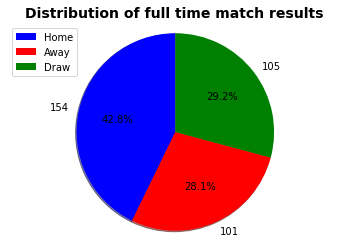

In [28]:
import matplotlib.pyplot as plt
HWins = np.sum(fixtures.Result_Predicted == 'H')
AWins = np.sum(fixtures.Result_Predicted == 'A')
DWins = np.sum(fixtures.Result_Predicted == 'D')
labels = ['Home', 'Away', 'Draw']
sizes = [HWins, AWins, DWins]
colors = ['blue', 'red', 'green']
patches, texts, juck = plt.pie(sizes, labels = sizes , colors=colors, shadow=True, startangle=90, radius = 2, autopct='%1.1f%%')
plt.title("Distribution of full time match results",size=14,fontweight='bold')
plt.legend(patches, labels, loc="upper left")
plt.axis('equal')
plt.show()